# Homework 1 - Pietro Zeduri 
## Ex. 2 - Step function
### Lax-Friedrichs method:

In [1]:
import numpy as np
import csv

# Define the name of the run

run_name_LF = 'base' #'cf11' - 'J400'

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points - Other used value is nx=401
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5     #Courant factor - Other used value is cf = 0.05
dt = cf*dx   #Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Define the initial condition
x0=5
u_initial_LF = np.empty(len(x))

# Define the initial condition
for i in range(len(x)):
    if x[i] >= 4 and x[i] <= 6:
        u_initial_LF[i] = 1
    else: u_initial_LF[i] = 0

        
# Initialize the solution array
u_current_LF = u_initial_LF.copy()  #Use copy! if u don't u would get a pointer! not a new array!

#we create arrays where we will store the time and the l2norm
l2norm_LF=[]
l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF))) #we expect it to be a consant! 

time=[]
time.append(0.0)


nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [2]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_LF_'+str(run_name_LF))

os.listdir('./')

/Users/pietro/Documents/Uni/numrel/Homework_1/STEP


['images_LF_base',
 'l2_compare_cf.png',
 'ini_fin_step_cf.png',
 '.DS_Store',
 'images_LW_cf',
 'images_LW',
 'Homework_step.ipynb',
 'images_LW_400',
 'Step_function.ipynb',
 'L2_LF.png',
 'images_LF_400',
 'L2_LW.png',
 'l2_compare_400.png',
 '.ipynb_checkpoints',
 'l2_compare.png',
 'images_LF',
 'ini_fin_step_LF.png',
 'images_LF_cf',
 'ini_fin_step_400.png']

In [3]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current_LF)
plt.title('Time='+str(round(t,2))+'[LF]')
plt.ylim(-0.5,1.5)
plt.grid(c = 'gray', alpha = 0.3)
plt.savefig('./images_LF_'+str(run_name_LF)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    u_next_LF = (np.roll(u_current_LF, 1) + np.roll(u_current_LF, -1))/2 - dt/(2*dx)*(np.roll(u_current_LF, -1) - np.roll(u_current_LF, 1))    
    
    # Update the solution
    u_current_LF = u_next_LF.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        plt.plot(x, u_current_LF)
        plt.title('Time='+str(round(t,2))+'[LF]')
        plt.ylim(-0.5,1.5)
        plt.grid(c = 'gray', alpha = 0.3)
        plt.savefig('./images_LF_'+str(run_name_LF)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()



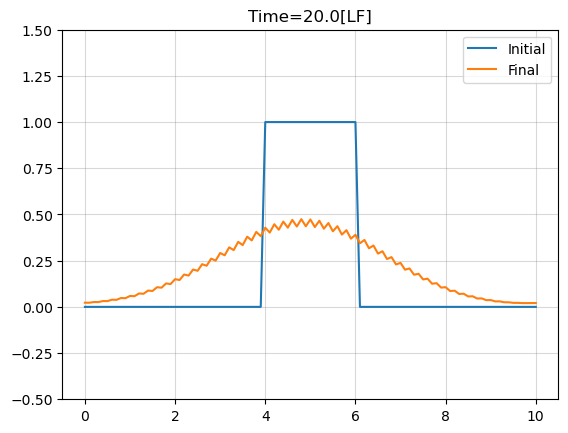

In [4]:
# Plot the final solution
plt.plot(x, u_initial_LF, label='Initial')
plt.plot(x, u_current_LF, label='Final')
plt.title('Time='+str(round(t,2))+'[LF]')
plt.ylim(-0.5,1.5)
plt.grid(c = 'gray', alpha = 0.3)
plt.legend()
#plt.show()
plt.savefig('ini_fin_LF_'+str(run_name_LF)+'.png')


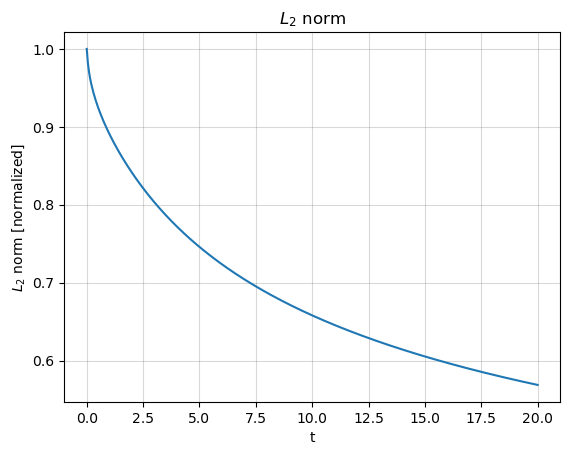

In [5]:
#Plot the L2 norm
plt.plot(time,l2norm_LF/l2norm_LF[0])
plt.grid(c='gray', alpha = 0.3)
plt.title(r'$L_2$ norm')
plt.xlabel('t')
plt.ylabel(r'$L_2$ norm [normalized]')
plt.savefig('L2_LF_'+str(run_name_LF)+'.png', dpi = 200)

### Lax-Wendroff scheme:

In [6]:
# Define the name of the run

run_name_LW = 'base' #'cf11' - 'J400'

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points - Other used value is nx=401
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5     #Courant factor - Other used value is cf = 0.05
dt = cf*dx   #Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Define the initial condition
x0=5
u_initial_LW = np.empty(len(x))

# Define the initial condition
for i in range(len(x)):
    if x[i] >= 4 and x[i] <= 6:
        u_initial_LW[i] = 1
    else: u_initial_LW[i] = 0

# Initialize the solution array
u_current_LW = u_initial_LW.copy() 

#we create arrays where we will store the time and the l2norm
l2norm_LW=[]
l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW))) #We expect it to be a consant! 

time=[]
time.append(0.0)


nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [7]:
#create directory where to save images
print(os.getcwd())

os.makedirs('./images_LW_'+str(run_name_LW))

os.listdir('./')

/Users/pietro/Documents/Uni/numrel/Homework_1/STEP


['images_LF_base',
 'l2_compare_cf.png',
 'ini_fin_step_cf.png',
 '.DS_Store',
 'images_LW_cf',
 'images_LW',
 'Homework_step.ipynb',
 'images_LW_400',
 'Step_function.ipynb',
 'images_LW_base',
 'L2_LF.png',
 'images_LF_400',
 'L2_LW.png',
 'l2_compare_400.png',
 '.ipynb_checkpoints',
 'l2_compare.png',
 'images_LF',
 'L2_LF_base.png',
 'ini_fin_LF_base.png',
 'ini_fin_step_LF.png',
 'images_LF_cf',
 'ini_fin_step_400.png']

In [8]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current_LW)
plt.title('Time='+str(round(t,2))+'[LW]')
plt.ylim(-0.5,1.5)
plt.grid(c = 'gray', alpha = 0.3)
plt.savefig('./images_LW_'+str(run_name_LW)+'/fig_'+str(0).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    u_next_LW = u_current_LW - dt/(2*dx)*(np.roll(u_current_LW, -1) - np.roll(u_current_LW, 1)) + (dt**2)/(2*dx**2)*(np.roll(u_current_LW, -1)-2*u_current_LW+np.roll(u_current_LW, 1))
    
    # Update the solution
    u_current_LW = u_next_LW.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        plt.plot(x, u_current_LW)
        plt.title('Time='+str(round(t,2))+'[LW]')
        plt.ylim(-0.5,1.5)
        plt.grid(c = 'gray', alpha = 0.3)
        plt.savefig('./images_LW_'+str(run_name_LW)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
        

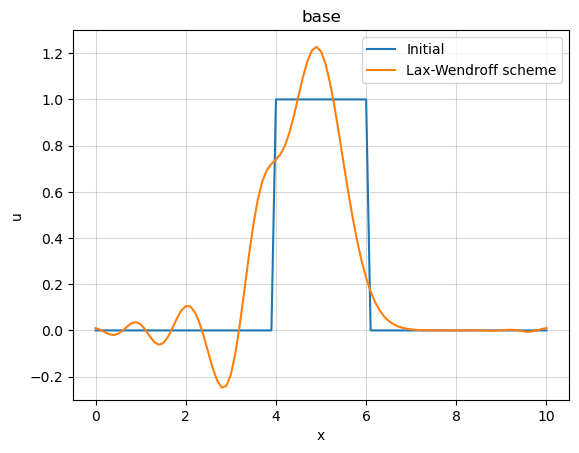

In [12]:
# Plot the final solution
plt.plot(x, u_initial_LW, label='Initial')
plt.plot(x, u_current_LW, label='Lax-Wendroff scheme')
plt.title(str(run_name_LW))
plt.ylim(-0.3,1.3)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(color = 'gray', alpha = 0.3)
#plt.show()
plt.savefig('ini_fin_LW_'+str(run_name_LW)+'.png', dpi = 200)

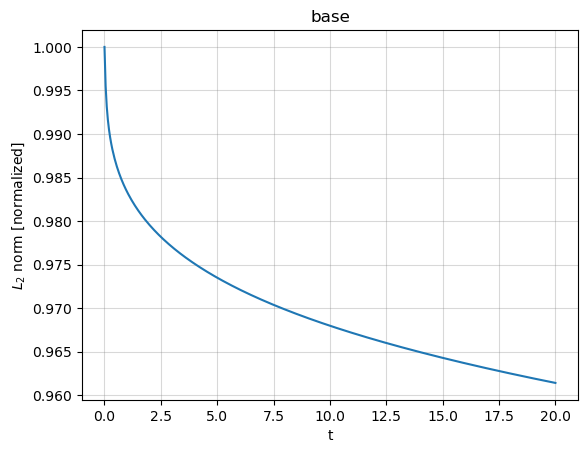

In [10]:
#Plot the L2 norm
plt.plot(time,l2norm_LW/l2norm_LW[0])
plt.grid(c='gray', alpha = 0.3)
plt.title(str(run_name_LW))
plt.xlabel('t')
plt.ylabel(r'$L_2$ norm [normalized]')
plt.savefig('L2_LW_'+str(run_name_LW)+'.png', dpi = 200)

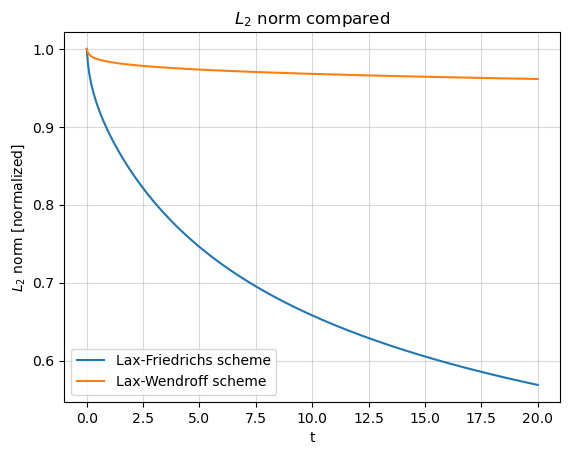

In [11]:
#Plot L2 norm of both schemes
plt.plot(time,l2norm_LF/l2norm_LF[0], label = 'Lax-Friedrichs scheme')
plt.plot(time,l2norm_LW/l2norm_LW[0], label = 'Lax-Wendroff scheme')
plt.grid(c='gray', alpha = 0.3)
plt.title(r'$L_2$ norm compared')
plt.xlabel('t')
plt.ylabel(r'$L_2$ norm [normalized]')
plt.legend()
plt.savefig('l2_comp_LF_'+str(run_name_LF)+'_LW_'+str(run_name_LW)+'.png', dpi = 200)